### Task 1 Implement Multi-output Perceptron for 
- AND gate 
- OR gate 
- Display weight matrix and bias vector 
### Task 2 Load Flowers Dataset 
- Train CNN model with 3 kernals. 
- Plot training and validation accuracy using graph. 

#### Task 1: Multi-output Perceptron for AND & OR Gates

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

2026-01-06 14:25:18.131612: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-06 14:25:18.138619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767689718.146879   27998 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767689718.149463   27998 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767689718.155833   27998 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

##### Prepare input data for AND and OR gates

In [2]:
# Input data (same for both gates)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Output for AND gate
y_and = np.array([0, 0, 0, 1])

# Output for OR gate
y_or = np.array([0, 1, 1, 1])

# Combined output (multi-output)
y_combined = np.column_stack([y_and, y_or])

print("Input X:")
print(X)
print("\nAND Output:", y_and)
print("OR Output:", y_or)
print("\nCombined Output (AND, OR):")
print(y_combined)

Input X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

AND Output: [0 0 0 1]
OR Output: [0 1 1 1]

Combined Output (AND, OR):
[[0 0]
 [0 1]
 [0 1]
 [1 1]]


##### Define step function

In [3]:
def step(z):
    """Step activation function"""
    return 1 if z >= 1 else 0

##### Train multi-output perceptron

In [ ]:
# Initialize weight matrix and bias vector
# Weight matrix: 2 inputs x 2 outputs (AND, OR)
W = np.random.rand(2, 2)
b = np.random.rand(2)

epochs = 50
learning_rate = 0.1

print("Initial Weight Matrix:")
print(W)
print("\nInitial Bias Vector:")
print(b)
print("\n" + "="*50)

# Training loop
for epoch in range(epochs):
    for i in range(X.shape[0]):
        # Forward pass for both outputs
        z = np.dot(X[i], W) + b
        y_pred = np.array([step(z[0]), step(z[1])])
        
        # Calculate error for both outputs
        error = y_combined[i] - y_pred
        
        # Update weights and biases
        W += learning_rate * np.outer(X[i], error)
        b += learning_rate * error

print("\nFinal Weight Matrix:")
print(W)
print("\nFinal Bias Vector:")
print(b)

Initial Weight Matrix:
[[0.86086512 0.62833361]
 [0.81681356 0.13760646]]

Initial Bias Vector:
[0.47531677 0.2329528 ]


Final Weight Matrix:
[[0.66086512 0.72833361]
 [0.71681356 0.43760646]]

Final Bias Vector:
[0.17531677 0.6329528 ]


##### Test the perceptron

In [5]:
print("\n" + "="*50)
print("PREDICTIONS:")
print("="*50)
print("Input\t\tAND\tOR")
print("-"*50)

for i in range(len(X)):
    z = np.dot(W.T, X[i]) + b
    and_out = step(z[0])
    or_out = step(z[1])
    print(f"{X[i]}\t\t{and_out}\t{or_out}")

print("="*50)


PREDICTIONS:
Input		AND	OR
--------------------------------------------------
[0 0]		0	0
[0 1]		0	1
[1 0]		0	1
[1 1]		1	1


---
#### Task 2: CNN Model for Flowers Dataset

##### Load and prepare Flowers dataset

In [6]:
# Load the tf_flowers dataset
import tensorflow_datasets as tfds
z
# Load the flowers dataset
(train_ds, val_ds), info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Get dataset info
num_classes = info.features['label'].num_classes
print(f"Number of classes: {num_classes}")
print(f"Class names: {info.features['label'].names}")

Number of classes: 5
Class names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


I0000 00:00:1767689719.771537   27998 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9420 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


##### Preprocess images

In [7]:
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):
    """Resize and normalize images"""
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize to [0,1]
    return image, label

# Apply preprocessing
train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(2)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(2)

print("Dataset prepared successfully!")

Dataset prepared successfully!


##### Build CNN model with 3 convolutional layers (kernels)

In [8]:
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    
    # First Convolutional Layer (Kernel 1)
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(2),
    
    # Second Convolutional Layer (Kernel 2)
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2),
    
    # Third Convolutional Layer (Kernel 3)
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2),
    
    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,325 (16.36 MB)

 Trainable params: 4,288,325 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

##### Compile and train the model

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)

print("\nTraining completed!")

Epoch 1/10


2026-01-06 14:25:20.822249: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
I0000 00:00:1767689720.897473   28159 service.cc:152] XLA service 0x727c34014ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767689720.897492   28159 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2026-01-06 14:25:20.914422: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1767689721.004359   28159 cuda_dnn.cc:529] Loaded cuDNN version 91701


19/92 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2698 - loss: 1.7361 

I0000 00:00:1767689723.081104   28159 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/92 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3655 - loss: 1.4830

2026-01-06 14:25:24.421448: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_324', 4 bytes spill stores, 4 bytes spill loads



92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3693 - loss: 1.4745

2026-01-06 14:25:26.907172: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_82', 4 bytes spill stores, 4 bytes spill loads



92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.3702 - loss: 1.4724 - val_accuracy: 0.5572 - val_loss: 1.0875
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5876 - loss: 1.0275 - val_accuracy: 0.6294 - val_loss: 0.9288
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6884 - loss: 0.8414 - val_accuracy: 0.6485 - val_loss: 0.8744
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7479 - loss: 0.6614 - val_accuracy: 0.6540 - val_loss: 0.9101
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8439 - loss: 0.4357 - val_accuracy: 0.6703 - val_loss: 0.9052
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9120 - loss: 0.2717 - val_accuracy: 0.6839 - val_loss: 1.0324
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9486 - loss: 0.1545 - val_accuracy: 0.7003 - val_loss: 1.0874
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9717 - loss: 0.0992 - val_accuracy: 0.7030 - val_loss: 1.

##### Plot training and validation accuracy

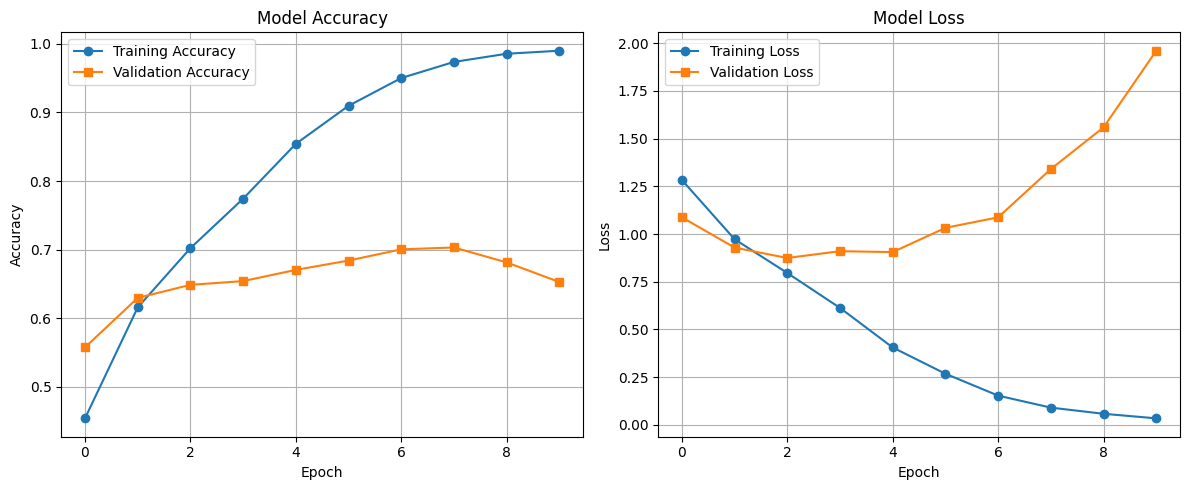


FINAL METRICS:
Training Accuracy: 0.9901
Validation Accuracy: 0.6526
Training Loss: 0.0343
Validation Loss: 1.9603


In [10]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final metrics
print("\n" + "="*50)
print("FINAL METRICS:")
print("="*50)
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print("="*50)